<h1 style="text-align: center;"><strong>Tareas Cortas - Bloque 1</strong></h1>


<ul>
<li><strong>Curso:</strong> CE5201: Procesamiento y An&aacute;lisis de Im&aacute;genes Digitales</li>
<li><strong>Estudiante:</strong> Luis Felipe Vargas Jimenez</li>
<li><strong>Carnet:</strong> 2020211831<br /><br /></li>

</ul>

<p><strong>Pregunta 2:</strong> Enunciado...</p>

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


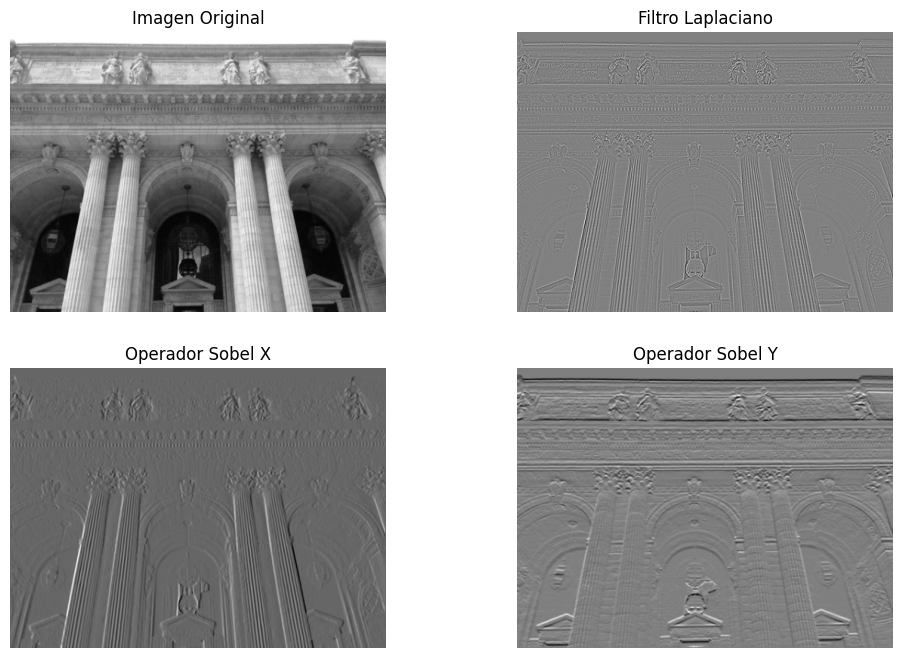

In [8]:


def apply_filters(image):
    # Aplicar filtros y operadores
    filters = {
        'Filtro Laplaciano': cv2.Laplacian(image, cv2.CV_64F),
        'Operador Sobel X': cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3),
        'Operador Sobel Y': cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    }
    return filters

# Leer la imagen en escala de grises
img = cv2.imread('columnas.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar que la imagen fue leída correctamente
if img is None:
    raise ValueError("Error al cargar la imagen. Verifica la ruta o el formato.")

# Aplicar los filtros
filters = apply_filters(img)

# Mostrar las imágenes
plt.figure(figsize=(12, 8))

# Mostrar la imagen original
plt.subplot(2, 2, 1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Mostrar los resultados de los filtros
for i, (title, filtered_image) in enumerate(filters.items(), 2):
    plt.subplot(2, 2, i)
    plt.title(title)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

plt.show()


<p><strong>Pregunta 3:</strong> Enunciado...</p>

C:\Users\Felipe vargas\AppData\Local\Temp\ipykernel_1844\121927562.py:51: RuntimeWarning: divide by zero encountered in divide
  return 1 / (1 + (cutoff / d) ** (2 * order))


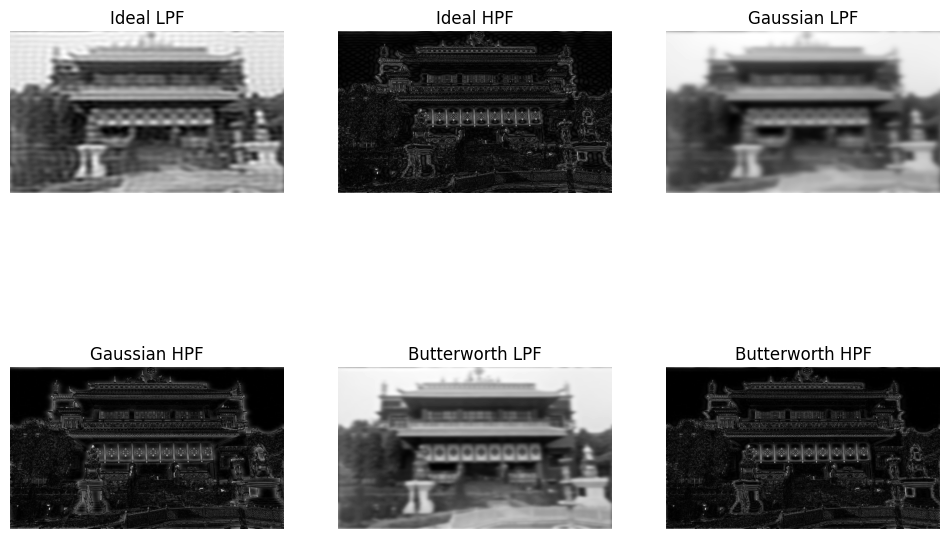

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Filtro ideal pasa-bajo
def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    mask = np.sqrt((x - ccol)**2 + (y - crow)**2) <= cutoff
    return mask.astype(np.float32)

# Filtro ideal pasa-alto (condición correcta)
def ideal_high_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    mask = np.sqrt((x - ccol)**2 + (y - crow)**2) > cutoff
    return mask.astype(np.float32)

# Filtro gaussiano pasa-bajo
def gaussian_low_pass_filter(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
    return np.exp(-(d ** 2) / (2 * (sigma ** 2)))

# Filtro gaussiano pasa-alto (sin restar de 1)
def gaussian_high_pass_filter(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
    return 1 - np.exp(-(d ** 2) / (2 * (sigma ** 2)))

# Filtro Butterworth pasa-bajo
def butterworth_low_pass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
    return 1 / (1 + (d / cutoff) ** (2 * order))

# Filtro Butterworth pasa-alto (sin restar de 1)
def butterworth_high_pass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
    return 1 / (1 + (cutoff / d) ** (2 * order))

# Aplicar filtro en el dominio de la frecuencia
def apply_frequency_filter(image, filter_mask):
    dft_shift = np.fft.fftshift(np.fft.fft2(image))
    filtered_dft = dft_shift * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_dft))
    return np.abs(filtered_image)

# Cargar la imagen
img = cv2.imread('edificio.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar que la imagen se cargó correctamente
if img is None:
    raise ValueError("Error al cargar la imagen. Verifica la ruta o el formato.")

# Parámetros
cutoff = 30  # Frecuencia de corte
order = 2    # Orden para el filtro Butterworth
sigma = 15   # Sigma para el filtro gaussiano

# Crear filtros
filters = {
    'Ideal LPF': ideal_low_pass_filter(img.shape, cutoff),
    'Ideal HPF': ideal_high_pass_filter(img.shape, cutoff),
    'Gaussian LPF': gaussian_low_pass_filter(img.shape, sigma),
    'Gaussian HPF': gaussian_high_pass_filter(img.shape, sigma),
    'Butterworth LPF': butterworth_low_pass_filter(img.shape, cutoff, order),
    'Butterworth HPF': butterworth_high_pass_filter(img.shape, cutoff, order)
}

# Aplicar los filtros y mostrar los resultados
plt.figure(figsize=(12, 8))
for i, (title, filter_mask) in enumerate(filters.items(), 1):
    filtered_image = apply_frequency_filter(img, filter_mask)
    plt.subplot(2, 3, i)
    plt.title(title)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

plt.show()


<p><strong>Pregunta 4:</strong> Enunciado...</p>

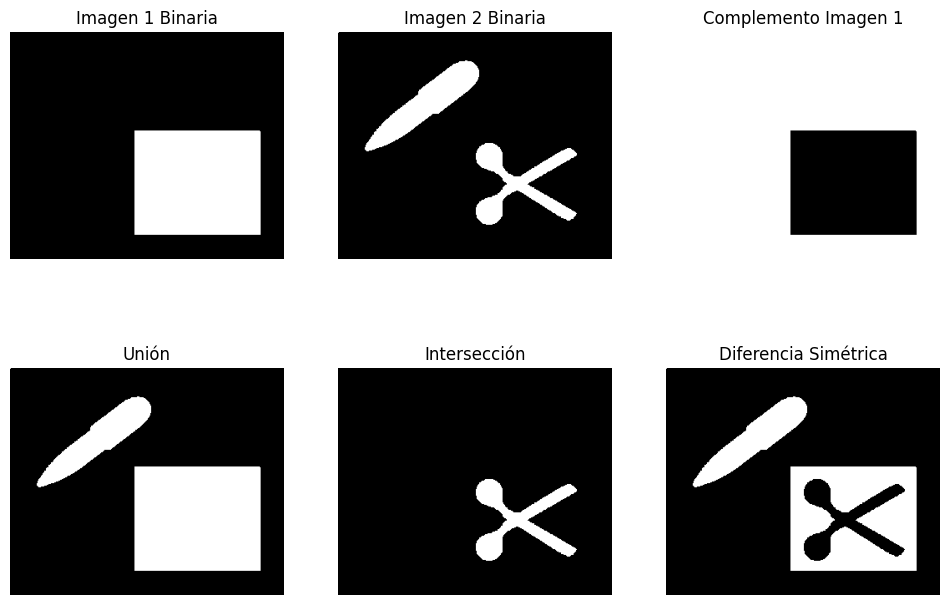

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer y convertir las imágenes a binario
img1 = cv2.imread('imagen2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('imagen3.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_img1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, binary_img2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

# Operaciones morfológicas
complemento_img1 = cv2.bitwise_not(binary_img1)
union = cv2.bitwise_or(binary_img1, binary_img2)
interseccion = cv2.bitwise_and(binary_img1, binary_img2)
diferencia_simetrica = cv2.bitwise_xor(binary_img1, binary_img2)

# Mostrar los resultados
imagenes = [binary_img1, binary_img2, complemento_img1, union, interseccion, diferencia_simetrica]
titulos = ['Imagen 1 Binaria', 'Imagen 2 Binaria', 'Complemento Imagen 1', 'Unión', 'Intersección', 'Diferencia Simétrica']

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.title(titulos[i])
    plt.imshow(imagenes[i], cmap='gray')
    plt.axis('off')
plt.show()
